# Performance evaluation of the gradient descent algorithm

In [1]:
%load_ext autoreload
%autoreload 2
from pytree import *
import random
import matplotlib.pyplot as plt
import numpy
from plotnine import *
import plotnine
plotnine.options.figure_size = (12, 8)

print(__version__)
print(__git_version__)

0.0.6
ee6093db082de75d0dfbcc85241b75e601b5bf2a


In [2]:
min_x = 1
max_x = 1e9
nb_breakpoints = 6
size = 200
numpy.random.seed(27)
#breakpoints = list(sorted(numpy.exp(numpy.random.uniform(numpy.log(min_x), numpy.log(max_x), nb_breakpoints))))
breakpoints = [10**n for n in range(1, 9)]
print(f'Breakpoints: {breakpoints}')
x_list = list(sorted(numpy.exp(numpy.random.uniform(numpy.log(min_x), numpy.log(max_x), size))))
interval_idx = 0
y_list = []
tmp_break = breakpoints + [numpy.inf]
for i, x in enumerate(x_list):
    if x > tmp_break[interval_idx]:
        interval_idx += 1
    assert x <= tmp_break[interval_idx]
    slope = interval_idx*1e-10
    intercept = (interval_idx+1)*10*1e-10
    y_list.append(x*slope + intercept)
dataset = list(zip(x_list, y_list))

Breakpoints: [10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]


In [3]:
sigma = 0.1
noisy_dataset = [(x, y+numpy.random.normal(scale=sigma)*x*1e-10) for x, y in dataset]
x = [t[0] for t in noisy_dataset] 
x = numpy.array(x)
y = [t[1] for t in noisy_dataset] 
y = numpy.array(y)

In [4]:
%%time
leaf = Leaf(x, y, Config(mode='log', epsilon=1e-12))

CPU times: user 2.4 ms, sys: 0 ns, total: 2.4 ms
Wall time: 2.42 ms


In [5]:
%%time
df = leaf._compute_log_parameters(start_coeff=abs(leaf._compute_classical_coeff()),
                                  start_intercept=abs(leaf._compute_classical_intercept()),
                                  eps=1e-15,
                                  max_iter=1000, return_search=True,
)
df

CPU times: user 78.2 ms, sys: 0 ns, total: 78.2 ms
Wall time: 78.4 ms


/home/tom/Dropbox/Documents/Fac/phd/pytree/pytree/reg.py:562: RuntimeWarning: invalid value encountered in log


,coefficient,intercept,error,index,final_step,D,new_D,D_coeff,D_inter
0,7.986585e-10,6.138239e-04,9644.362885,0,NaN,NaN,NaN,NaN,NaN
1,5.609725e-10,6.138239e-04,9634.333810,1,3.292094e-21,7.219903e+10,-0.000015,7.219902e+10,3.026470e+06
2,2.629291e-08,-3.315140e-08,3430.559841,2,2.027516e-10,3.027632e+06,1.749700,-1.269136e+02,3.027632e+06
3,2.604058e-08,-3.315141e-08,3418.497997,3,4.074903e-21,6.192246e+10,0.000967,6.192246e+10,2.595695e+06
4,2.604056e-08,-3.283001e-08,3414.878088,4,6.576150e-21,4.887263e+10,-0.000124,2.048666e+06,-4.887263e+10
5,2.578847e-08,-3.283002e-08,3402.732905,5,4.041583e-21,6.237531e+10,0.006428,6.237531e+10,2.614678e+06
6,2.578846e-08,-3.250893e-08,3399.095783,6,6.521949e-21,4.923287e+10,0.000062,2.063767e+06,-4.923287e+10
7,2.553659e-08,-3.250894e-08,3386.865941,7,4.008291e-21,6.283514e+10,-0.006207,6.283514e+10,2.633953e+06
8,2.553658e-08,-3.218814e-08,3383.211378,8,6.467795e-21,4.959871e+10,-0.000099,2.079102e+06,-4.959871e+10
9,2.553658e-08,-3.218826e-08,3383.211378,9,4.390633e-20,2.653529e+06,0.000085,0.000000e+00,2.653529e+06


In [6]:
df['prev_coeff'] = df['coefficient'].shift(1)
df['prev_inter'] = df['intercept'].shift(1)
df

,coefficient,intercept,error,index,final_step,D,new_D,D_coeff,D_inter,prev_coeff,prev_inter
0,7.986585e-10,6.138239e-04,9644.362885,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.609725e-10,6.138239e-04,9634.333810,1,3.292094e-21,7.219903e+10,-0.000015,7.219902e+10,3.026470e+06,7.986585e-10,6.138239e-04
2,2.629291e-08,-3.315140e-08,3430.559841,2,2.027516e-10,3.027632e+06,1.749700,-1.269136e+02,3.027632e+06,5.609725e-10,6.138239e-04
3,2.604058e-08,-3.315141e-08,3418.497997,3,4.074903e-21,6.192246e+10,0.000967,6.192246e+10,2.595695e+06,2.629291e-08,-3.315140e-08
4,2.604056e-08,-3.283001e-08,3414.878088,4,6.576150e-21,4.887263e+10,-0.000124,2.048666e+06,-4.887263e+10,2.604058e-08,-3.315141e-08
5,2.578847e-08,-3.283002e-08,3402.732905,5,4.041583e-21,6.237531e+10,0.006428,6.237531e+10,2.614678e+06,2.604056e-08,-3.283001e-08
6,2.578846e-08,-3.250893e-08,3399.095783,6,6.521949e-21,4.923287e+10,0.000062,2.063767e+06,-4.923287e+10,2.578847e-08,-3.283002e-08
7,2.553659e-08,-3.250894e-08,3386.865941,7,4.008291e-21,6.283514e+10,-0.006207,6.283514e+10,2.633953e+06,2.578846e-08,-3.250893e-08
8,2.553658e-08,-3.218814e-08,3383.211378,8,6.467795e-21,4.959871e+10,-0.000099,2.079102e+06,-4.959871e+10,2.553659e-08,-3.250894e-08
9,2.553658e-08,-3.218826e-08,3383.211378,9,4.390633e-20,2.653529e+06,0.000085,0.000000e+00,2.653529e+06,2.553658e-08,-3.218814e-08


/home/tom/.cache/pypoetry/virtualenvs/pytree-ulWrBEt--py3.7/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_segment : Removed 1 rows containing missing values.


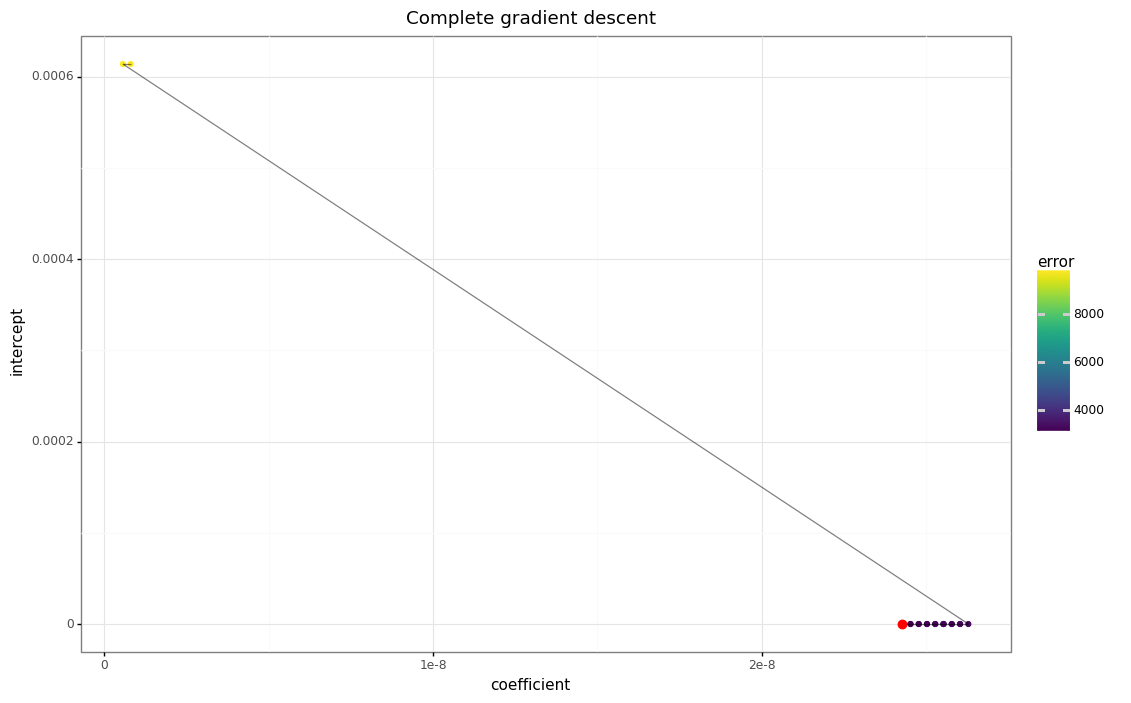

<ggplot: (8785603606448)>

In [7]:
(ggplot(df)
    + aes(x='coefficient', y='intercept')
    + geom_point(aes(color='error'))
    + geom_segment(aes(xend='prev_coeff', yend='prev_inter'), alpha=0.5)
    + geom_point(data=df.tail(n=1), color='red', size=3)
    + theme_bw()
    + ggtitle('Complete gradient descent')
)

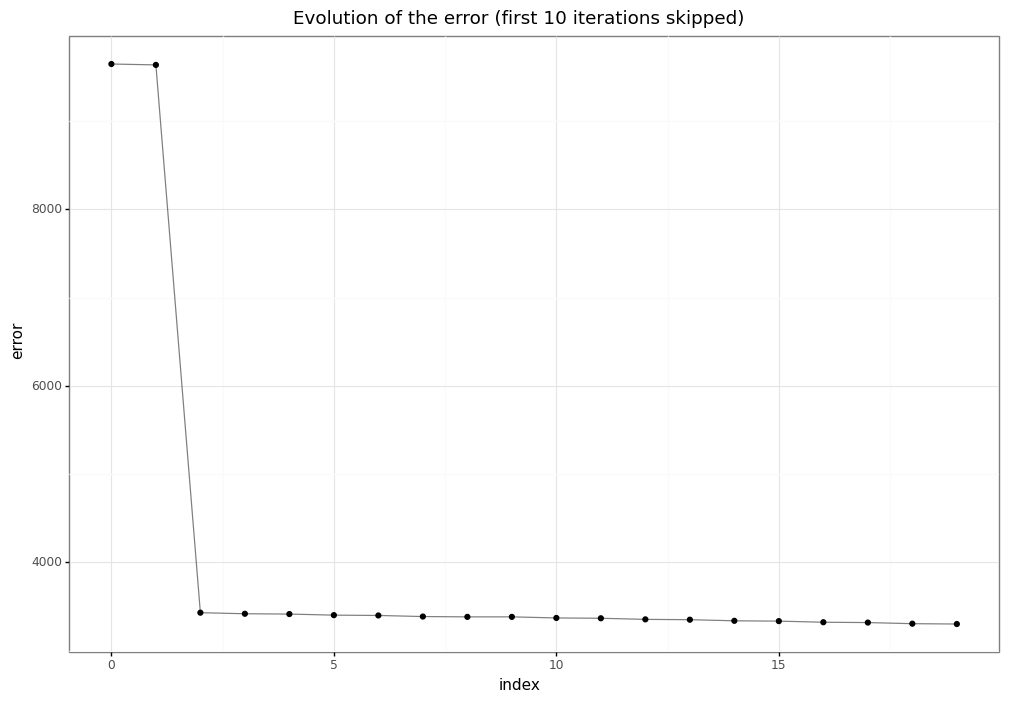

<ggplot: (-9223363251251194252)>

In [8]:
(ggplot(df)
    + aes(x='index', y='error')
    + geom_point()
    + geom_line(alpha=0.5)
    + theme_bw()
    + ggtitle('Evolution of the error (first 10 iterations skipped)')
)